# Experimento efeito fotoelétrico

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [25]:
from google.colab import auth
import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

sh = gc.open_by_key("1SOZPPe9Z2OIChPyEEbToIPk-HXn6UW8QDEwILP7v7s0")

In [26]:
sh.worksheets()

RefreshError: ignored

In [2]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.weight'] = 'regular'
sns.set_theme()

## Miscelânea

In [3]:
df_blocked = pd.read_csv('blocked_sensor.csv')

In [5]:
df_lightsoff = pd.read_csv('lights_off.csv')

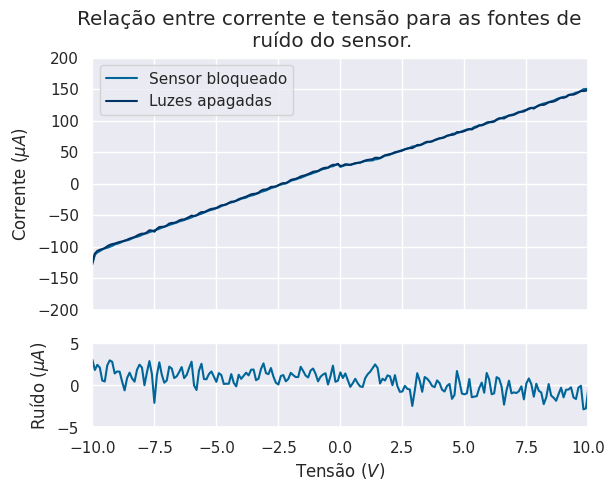

In [8]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={ 'hspace': 0.2, 'height_ratios': (3,1)})
plt.suptitle('Relação entre corrente e tensão para as fontes de \nruído do sensor.')

sns.lineplot(x=df_blocked['Tensao'], y=df_blocked['Corrente']*1E6, color='#006699', ax=axs[0], label='Sensor bloqueado')
sns.lineplot(x=df_lightsoff['Tensao'], y=df_lightsoff['Corrente']*1E6, color='#003366', ax=axs[0], label='Luzes apagadas')
sns.lineplot(x=df_lightsoff['Tensao'], y=(df_lightsoff['Corrente'] - df_blocked['Corrente'])*1E6, color='#006699', ax=axs[1])

axs[0].set_ylabel('Corrente ($\mu A$)')
axs[1].set_ylabel('Ruído ($\mu A$)')

axs[0].set_ylim(-200, 200)
axs[1].set_ylim(-5, 5)

plt.xlabel('Tensão ($V$)')
plt.xlim(-10, 10)

plt.show()

Do gráfico da relação entre corrente e a tensão para as fontes de ruídos do sistema, vemos que a contribuição da radiação ambiente é mínima e portanto, para corrigir os dados, usaremos o sinal das luzes apagadas.

## Diferentes comprimentos de ondas

In [15]:
beams = [ 'yellow', 'green', 'blue', 'violet', 'ultra-violet' ]
names = [ 'Amarelo', 'Verde', 'Azul', 'Violeta', 'Ultra-violeta' ]
hexes = [ '#F5DE00', '#02810F', '#006699', '#7F00FF', '#26112B' ]

In [16]:
df_beams = {}
for beam in beams: df_beams[beam] = pd.read_csv(f'{beam}.csv')

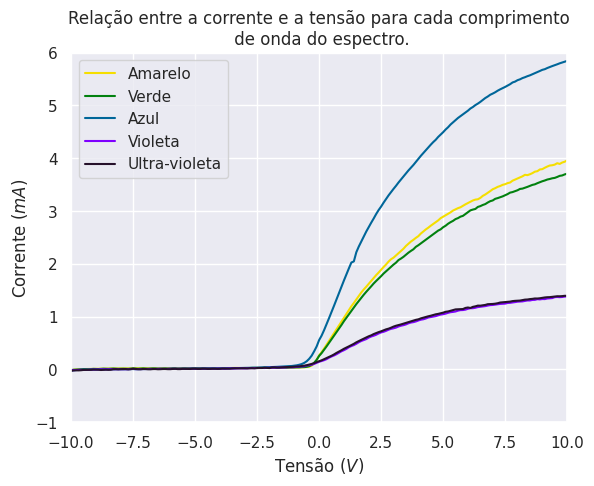

In [21]:
plt.title('Relação entre a corrente e a tensão para cada comprimento\n de onda do espectro.')

for i,beam in enumerate(beams): sns.lineplot(x=df_beams[beam]['Tensao'], y=(df_beams[beam]['Corrente'] - df_lightsoff['Corrente'])*1E3, label=names[i], color=hexes[i])

plt.xlabel('Tensão ($V$)')
plt.ylabel('Corrente ($mA$)')
plt.xlim(-10, 10)
plt.ylim(-1, 6)

plt.legend()
plt.show()

## Diferentes intensidades do azul

In [18]:
blues = [ 0, 20, 40, 60, 80, 100 ]

In [19]:
df_blues = { 0: df_beams['blue'] }
for blue in blues[1:]: df_blues[blue] = pd.read_csv(f'blue_{blue}.csv')

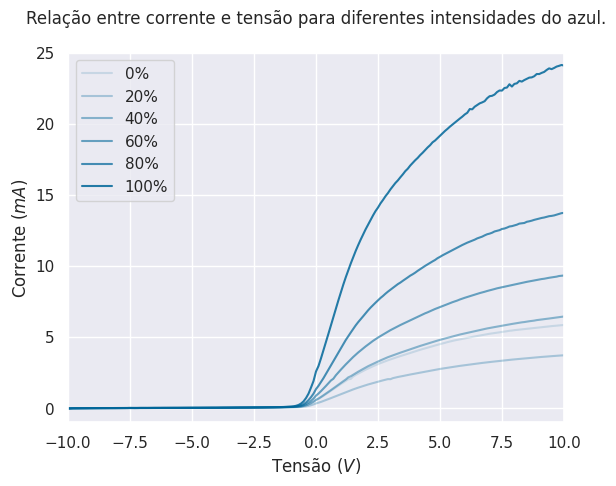

In [22]:
plt.title('Relação entre corrente e tensão para diferentes intensidades do azul.\n')

for i,blue in enumerate(blues): sns.lineplot(x=df_blues[blue]['Tensao'], y=(df_blues[blue]['Corrente'] - df_lightsoff['Corrente'])*1E3, label=f'{blue}%', color='#006699', alpha=0.15+0.14*(i))

plt.xlabel('Tensão ($V$)')
plt.ylabel('Corrente ($mA$)')
plt.xlim(-10, 10)
plt.ylim(-1, 25)

plt.legend()
plt.show()